In [1]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [2]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [3]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

<Axes: >

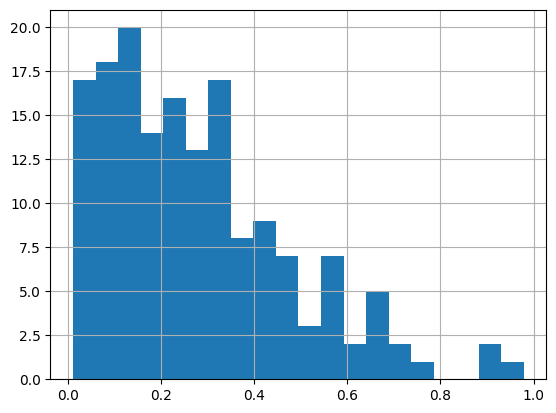

In [4]:
sympdf.mean().hist(bins=20)

In [5]:
sympdf.mean().sort_values(ascending=False).head(10)
# we're filtering out fatigue, short term memory only (ok)

Symptom_Fatigue                                         0.979440
Symptom_Memory_short                                    0.924225
Symptom_PEM                                             0.883601
Symptom_Cognitive_Functioning_attentionconcentration    0.752943
Symptom_Shortness_of_breath                             0.736860
Symptom_Insomnia                                        0.693252
Symptom_Tightness_of_chest                              0.680153
Symptom_Muscle_aches                                    0.677168
Symptom_Dizziness_vertigo                               0.672525
Symptom_Cognitive_Functioning_thinking                  0.666225
dtype: float64

In [6]:
# while these are rare, combos of rare sypmtoms might group together
# and some are particularly significant. I think I could either filter at the 5% mark on either side
# or I could  
sympdf.mean().sort_values(ascending=True).head(40)


Symptom_Eye_Vision_loss_of_vision                         0.011109
Symptom_Reproductive_early_menopause                      0.013928
Symptom_Reproductive_postmenopausal_bleeding              0.016084
Symptom_Hallucinations_other                              0.023379
Symptom_SkinAllergy_shingles                              0.025701
Symptom_Heightened_taste                                  0.030841
Symptom_Sensations_facial_paralysis                       0.032001
Symptom_Hallucinations_tactile                            0.033659
Symptom_Reproductive_testicle_penis_pain_changes          0.036478
Symptom_Eye_Vision_tunnel_vision                          0.038302
Symptom_New_anaphylaxis                                   0.042945
Symptom_Speech_other                                      0.043111
Symptom_Coughing_up_blood                                 0.047919
Symptom_Ear_numbness                                      0.049411
Symptom_Inability_to_yawn                                 0.05

In [7]:
# trying with 10% 
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.1) & (sympdf.sum()  / sympdf.shape[0]< 0.9)]

In [8]:
sympdf.shape

(6031, 126)

In [9]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=123)


In [10]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.56s/it, max_LL=-3.78e+5, max_avg_LL=-62.7]


StepMix(measurement='binary', n_components=9, random_state=123)

In [11]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
}

# no gaussians or whatever, so n_steps can just be 1 

gs = GridSearchCV(estimator=model, cv=3, param_grid=grid, verbose=0)
gs.fit(sympdf)



Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.77it/s, max_LL=-2.64e+5, max_avg_LL=-65.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.41it/s, max_LL=-2.64e+5, max_avg_LL=-65.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.83it/s, max_LL=-2.66e+5, max_avg_LL=-66.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.70it/s, max_LL=-2.59e+5, max_avg_LL=-64.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.92it/s, max_LL=-2.59e+5, max_avg_LL=-64.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.23it/s, max_LL=-2.61e+5, max_avg_LL=-64.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.61it/s, max_LL=-2.56e+5, max_avg_LL=-63.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.33it/s, max_LL=-2.56e+5, max_avg_LL=-63.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.52it/s, max_LL=-2.59e+5, max_avg_LL=-64.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.86it/s, max_LL=-2.54e+5, max_avg_LL=-63.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.32it/s, max_LL=-2.55e+5, max_avg_LL=-63.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.58it/s, max_LL=-2.57e+5, max_avg_LL=-63.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.47s/it, max_LL=-2.53e+5, max_avg_LL=-63]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.47it/s, max_LL=-2.53e+5, max_avg_LL=-63]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.92it/s, max_LL=-2.56e+5, max_avg_LL=-63.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.63s/it, max_LL=-2.52e+5, max_avg_LL=-62.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.32s/it, max_LL=-2.53e+5, max_avg_LL=-62.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.05s/it, max_LL=-2.55e+5, max_avg_LL=-63.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.83s/it, max_LL=-2.51e+5, max_avg_LL=-62.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.76s/it, max_LL=-2.52e+5, max_avg_LL=-62.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.39s/it, max_LL=-2.54e+5, max_avg_LL=-63.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.71s/it, max_LL=-2.5e+5, max_avg_LL=-62.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-2.51e+5, max_avg_LL=-62.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.80s/it, max_LL=-2.54e+5, max_avg_LL=-63.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.47s/it, max_LL=-2.5e+5, max_avg_LL=-62.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.66s/it, max_LL=-2.51e+5, max_avg_LL=-62.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.11s/it, max_LL=-2.53e+5, max_avg_LL=-63]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.75s/it, max_LL=-2.49e+5, max_avg_LL=-62]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.99s/it, max_LL=-2.5e+5, max_avg_LL=-62.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.30s/it, max_LL=-2.53e+5, max_avg_LL=-62.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.33s/it, max_LL=-2.49e+5, max_avg_LL=-61.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.97s/it, max_LL=-2.49e+5, max_avg_LL=-62]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.24s/it, max_LL=-2.52e+5, max_avg_LL=-62.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.92s/it, max_LL=-2.48e+5, max_avg_LL=-61.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.24s/it, max_LL=-2.49e+5, max_avg_LL=-62]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.24s/it, max_LL=-2.52e+5, max_avg_LL=-62.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.26s/it, max_LL=-2.48e+5, max_avg_LL=-61.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it, max_LL=-2.49e+5, max_avg_LL=-61.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.47s/it, max_LL=-2.51e+5, max_avg_LL=-62.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.46s/it, max_LL=-2.48e+5, max_avg_LL=-61.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.58s/it, max_LL=-2.48e+5, max_avg_LL=-61.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.41s/it, max_LL=-2.51e+5, max_avg_LL=-62.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  4.00s/it, max_LL=-2.47e+5, max_avg_LL=-61.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.59s/it, max_LL=-2.48e+5, max_avg_LL=-61.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.76s/it, max_LL=-2.51e+5, max_avg_LL=-62.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.10s/it, max_LL=-2.47e+5, max_avg_LL=-61.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-2.48e+5, max_avg_LL=-61.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.21s/it, max_LL=-2.5e+5, max_avg_LL=-62.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.23s/it, max_LL=-2.47e+5, max_avg_LL=-61.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.13s/it, max_LL=-2.47e+5, max_avg_LL=-61.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.94s/it, max_LL=-2.5e+5, max_avg_LL=-62.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.58s/it, max_LL=-2.47e+5, max_avg_LL=-61.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.24s/it, max_LL=-2.47e+5, max_avg_LL=-61.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.63s/it, max_LL=-2.5e+5, max_avg_LL=-62.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.30s/it, max_LL=-2.46e+5, max_avg_LL=-61.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.65s/it, max_LL=-2.47e+5, max_avg_LL=-61.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.88s/it, max_LL=-2.5e+5, max_avg_LL=-62.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.21s/it, max_LL=-2.46e+5, max_avg_LL=-61.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.51s/it, max_LL=-2.46e+5, max_avg_LL=-61.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.26s/it, max_LL=-2.49e+5, max_avg_LL=-62]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.72s/it, max_LL=-2.45e+5, max_avg_LL=-61]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.11s/it, max_LL=-2.46e+5, max_avg_LL=-61.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.13s/it, max_LL=-2.49e+5, max_avg_LL=-61.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-2.45e+5, max_avg_LL=-61]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.37s/it, max_LL=-2.46e+5, max_avg_LL=-61.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.04s/it, max_LL=-2.49e+5, max_avg_LL=-61.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.43s/it, max_LL=-2.45e+5, max_avg_LL=-60.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.21s/it, max_LL=-2.46e+5, max_avg_LL=-61.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.84s/it, max_LL=-2.49e+5, max_avg_LL=-61.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.99s/it, max_LL=-2.45e+5, max_avg_LL=-60.9]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.22s/it, max_LL=-2.45e+5, max_avg_LL=-61]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.13s/it, max_LL=-2.48e+5, max_avg_LL=-61.7]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.46s/it, max_LL=-3.71e+5, max_avg_LL=-61.4]


GridSearchCV(cv=3,
             estimator=StepMix(measurement='binary', n_components=9,
                               random_state=123),
             param_grid={'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25]})

In [12]:
results = pd.DataFrame(gs.cv_results_)
results["Val. Log Likelihood"] = results['mean_test_score']

In [13]:
results_old = results.copy()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_97052/1270231869.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',


<Axes: xlabel='param_n_components', ylabel='Val. Log Likelihood'>

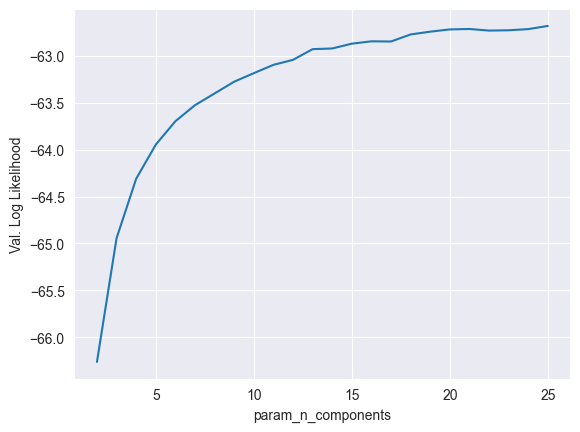

In [14]:
sns.set_style("darkgrid")
sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',
              palette='Dark2')

In [15]:
%%capture
results = dict(param_n_components=[], aic=[], bic=[])

# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    model.fit(sympdf)
    results['param_n_components'].append(g['n_components'])
    results['aic'].append(model.aic(sympdf))
    results['bic'].append(model.bic(sympdf))

# Save results to a dataframe
results = pd.DataFrame(results)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_97052/63445388.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='aic',


<Axes: xlabel='param_n_components', ylabel='aic'>

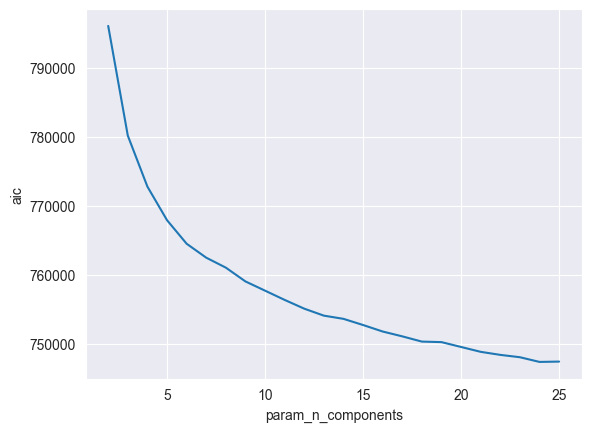

In [16]:
sns.lineplot(data=results, x='param_n_components', y='aic',
             palette='Dark2')

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_97052/2943425988.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='bic',


<Axes: xlabel='param_n_components', ylabel='bic'>

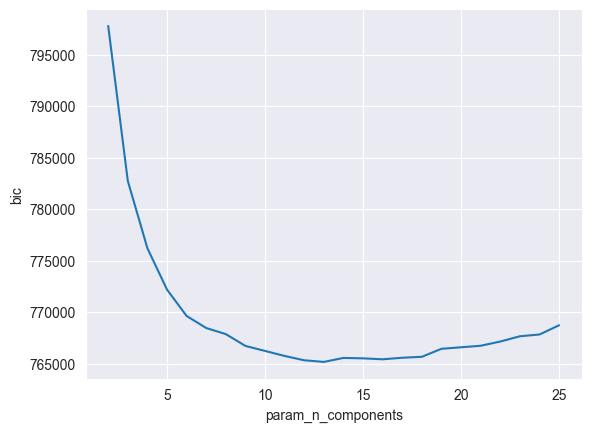

In [17]:
sns.lineplot(data=results, x='param_n_components', y='bic',
            palette='Dark2')

In [18]:
results['bic']

0     797776.760967
1     782732.606457
2     776196.750592
3     772184.516089
4     769625.088409
5     768453.606406
6     767862.538527
7     766716.128293
8     766229.910533
9     765741.824621
10    765324.038328
11    765163.834581
12    765552.336647
13    765510.746088
14    765419.239509
15    765569.374988
16    765661.093184
17    766437.353558
18    766585.153269
19    766732.466686
20    767142.913264
21    767654.734807
22    767825.218142
23    768724.431716
Name: bic, dtype: float64

In [19]:
# print the row of results with the lowest bic
results.iloc[results['bic'].idxmin()]


param_n_components        13.000000
aic                   754101.132194
bic                   765163.834581
Name: 11, dtype: float64

We observe that the Bayes information criteria is optimal at 13 clusters

Based on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7746621/?fbclid=IwAR3Gy0vBZIDrylHZpe9I0zlDiNaV1WaUrPMcAZO9seZJzkOoM6ZNeLEUd98 for a model of this size it is reasonable to use BIC, so I'm going to go ahead with 13 classes. If they end up looking highly redundant or one is especially small we can plan to scale back. 

In [20]:
model = StepMix(n_components=13, measurement="binary", verbose=1, random_state=123)
model.fit(sympdf)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.51s/it, max_LL=-3.75e+5, max_avg_LL=-62.2]

MODEL REPORT
    Measurement model parameters
          model_name                                                   binary                                                                                                
          class_no                                                         0       1       2       3       4       5       6       7       8       9       10      11      12
          param variable                                                                                                                                                     
          pis   Symptom_Acid_reflux                                    0.3720  0.7956  0.3809  0.3008  0.0619  0.4356  0.5891  0.3843  0.1101  0.1569  0.3971  0.1706  0.6278
                Symptom_Acute_confusion                                0.1253  0.7292  0.2702  0.0073  0.0027  0.0728  0.5823  0.2652  0.0281  0.0686  0.2723  0.1966  0.3251
                Symptom_Altered_smell                                  0.2357  0.650

StepMix(measurement='binary', n_components=13, random_state=123, verbose=1)

In [21]:
# save model using pkl
with open('output/stepmix_13_112623.pkl', 'wb') as f:
    pkl.dump(model, f)

In [22]:
mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_13_112623_mmdf.csv")

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x1044a3380> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [23]:
# These are just the most prevalent symptoms per cluster
# in general, this is dominated by symptoms with high cross-dataset prevalence
print(mm.sort_values(0,ascending=False).head(10).index)
print(mm.sort_values(2,ascending=False).head(10).index)
print(mm.sort_values(3,ascending=False).head(10).index)
print(mm.sort_values(4,ascending=False).head(10).index)
print(mm.sort_values(5,ascending=False).head(10).index)
print(mm.sort_values(6,ascending=False).head(10).index)
print(mm.sort_values(7,ascending=False).head(10).index)

Index(['Symptom_PEM', 'Symptom_Shortness_of_breath', 'Symptom_Insomnia',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Elevated_temp', 'Symptom_Tightness_of_chest',
       'Symptom_Dry_cough', 'Symptom_Muscle_aches', 'Symptom_Diarrhea',
       'Symptom_Dizziness_vertigo'],
      dtype='object', name='variable')
Index(['Symptom_PEM', 'Symptom_Speech_difficulty_finding_words',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Cognitive_Functioning_thinking', 'Symptom_Dizziness_vertigo',
       'Symptom_Shortness_of_breath',
       'Symptom_Cognitive_Functioning_executive', 'Symptom_Muscle_aches',
       'Symptom_Cognitive_Functioning_problemsolving',
       'Symptom_Tightness_of_chest'],
      dtype='object', name='variable')
Index(['Symptom_PEM', 'Symptom_Shortness_of_breath',
       'Symptom_Tightness_of_chest', 'Symptom_Heart_palpitations',
       'Symptom_Dry_cough', 'Symptom_Insomnia', 'Symptom_Diarrhea',
       'Symptom_

In [24]:
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

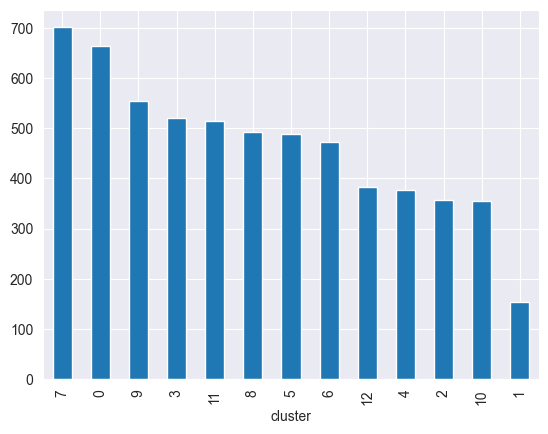

In [25]:
df['cluster'].value_counts().plot(kind='bar')
# all clusters have more than 150 patients

In [26]:
comp_list = list(range(0,13))

In [27]:
edges = [] 
symp_unusual = pd.DataFrame()
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    symp_unusual[component] = investigate_comp(component, mm)
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

variable
Symptom_Elevated_temp             0.250514
Symptom_Fever                     0.248269
Symptom_Temp_lability             0.206914
Symptom_Loss_of_appetite          0.158931
Symptom_Diarrhea                  0.156464
Symptom_Insomnia                  0.146446
Symptom_Chills_flushing_sweats    0.130168
Symptom_Shortness_of_breath       0.123507
Symptom_Dry_cough                 0.118885
Symptom_Loss_of_taste             0.095952
dtype: float64
variable
Symptom_Eye_Vision_sensitivity_to_light              0.672912
Symptom_SkinAllergy_itchy_skin                       0.645113
Symptom_Difficulty_swallowing                        0.628623
Symptom_SkinAllergy_itchy_eyes                       0.623251
Symptom_Muscle_spasms                                0.605897
Symptom_Ear_ear_pain                                 0.598576
Symptom_Tremors                                      0.593955
Symptom_Sensations_electrical_zaps                   0.590507
Symptom_Speech_difficulty_reading_process

In [28]:
print(df.cluster.value_counts().sort_index())

cluster
0     663
1     154
2     357
3     521
4     377
5     488
6     472
7     701
8     492
9     555
10    354
11    514
12    383
Name: count, dtype: int64


In [29]:
(sympdf[edges].mean()>.90).sum()

0

In [30]:
(sympdf[edges].mean()<.1).sum()
# some of the pretty rare symptoms are cluster-decisive
# I'm going to keep them in unless something pathological emerges downstream

0

In [31]:
symp_unusual.to_csv("output/stepmix_13_112623_symp_unusual.csv")

In [32]:
# plan for next time 
# plot the clusters in 2d space
# go through that sklearn paper for some plot ideas
# look at the various non-used parameters and how they assort
# look at demographics, other columns of df
# assess distinguisability of clusters--maybe some can combine?

# could laplace approximation be used to get a better estimate of the number of clusters?
# if have reason to think p(data | model ) is close to p(model), then maybe justify fewer clusters

In [33]:
mm[0]

variable
Symptom_Acid_reflux                0.372031
Symptom_Acute_confusion            0.125328
Symptom_Altered_smell              0.235660
Symptom_Altered_taste              0.287062
Symptom_Awakened_cannot_breathe    0.380702
                                     ...   
Symptom_Vibrating_sensations       0.254690
Symptom_Vivid_dreams               0.357820
Symptom_Vomiting                   0.202000
Symptom_Waking_up_early            0.233385
Symptom_Waking_up_in_night         0.560791
Name: 0, Length: 126, dtype: float64

In [34]:
# check if patients asigned to cluster 0 have average scores equivalent to column 0 of mm
# this is a bit of a sanity check

mm[0].sort_index()

df[df.cluster==0][sympdf.columns].mean().sort_index()

Symptom_Acid_reflux                0.375566
Symptom_Acute_confusion            0.122172
Symptom_Altered_smell              0.233786
Symptom_Altered_taste              0.282051
Symptom_Awakened_cannot_breathe    0.375566
                                     ...   
Symptom_Vibrating_sensations       0.251885
Symptom_Vivid_dreams               0.357466
Symptom_Vomiting                   0.199095
Symptom_Waking_up_early            0.229261
Symptom_Waking_up_in_night         0.565611
Length: 126, dtype: float64

In [57]:
model.predict(sympdf)

array([ 8, 11,  8, ...,  7,  8, 11])

In [36]:
df['cluster'].to_csv("output/cluster_13_112623.csv")

In [37]:
def load_run(n_components, date):
    clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
    mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
    symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)

    file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

    with open(file_path, 'rb') as file:
        model = pkl.load(file)
    return({"clusters": clusters, "mm": mm, "symp_unusual": symp_unusual, "model": model})

In [38]:
def filter_poor_fits(model, sympdf, clusterdf,  threshold = 0.5):
    # filter out poor fits
    # get the probability of each patient belonging to each cluster
    preddf = pd.DataFrame(model.predict_proba(sympdf),index=sympdf.index)
    print(preddf[preddf > 0.5].notna().sum(axis=1).value_counts())
    poor_fits = preddf[preddf[preddf > 0.5].notna().sum(axis=1) == 0].index.values
    clusterdf.loc[clusterdf.index.isin(poor_fits),'cluster']= np.nan
    return(clusterdf)

In [39]:
def get_preddf(model, sympdf):
    # filter out poor fits
    # get the probability of each patient belonging to each cluster
    preddf = pd.DataFrame(model.predict_proba(sympdf),index=sympdf.index)
    return(preddf)

In [40]:
n_components = 13
date = "112623"
res= load_run(n_components, date)
clust= filter_poor_fits(res["model"], sympdf, res["clusters"])
clust.to_csv("output/cluster_"+str(n_components)+"_ambiguousNaN_111023.csv")
preddf = pd.DataFrame(res["model"].predict_proba(sympdf),index=sympdf.index)
preddf.to_csv("output/stepmix_"+str(n_components)+"_"+date+"_preddf.csv")
print(clust.columns)

1    5915
0     116
Name: count, dtype: int64
Index(['cluster'], dtype='object')


In [43]:
olddate = "111023"

predold = pd.read_csv("output/stepmix_"+str(n_components)+"_"+olddate+"_preddf.csv", index_col=0)

In [46]:
clustold = pd.read_csv("output/cluster_"+str(n_components)+"_"+olddate+".csv", index_col=0)

In [58]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clust['cluster'], clustold['cluster'])

ValueError: Input contains NaN.

In [60]:
clust1 = pd.read_csv("output/cluster_13_111023.csv", index_col=0)
clust2 = pd.read_csv("output/cluster_13_112623.csv", index_col=0)

In [61]:
adjusted_rand_score(clust1['cluster'], clust2['cluster'])

0.6037766858989958